Capstone Project - Data Analysis (Automobile) - by Alex Chu

Exploratory data analysis (EDA) on automobile dataset.

To clean, sanitise, and explore the automobile.csv dataset.
Taks involves:
- Load the dataframe in
- Clean the data
- Remove duplicate rows
- Discard irrelevant data columns
- Manipulate certain columns to the correct data type
- Answer some questions about the data

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import missingno as msno

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches

In [2]:
#### Load the automobile dataset 
automobile_df = pd.read_csv('automobile.txt')
automobile_df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


### Data Cleansing
#### Clean the data

Identify columns that are redundant or unnecessary. It is always easier to make your decisions based on data which is relevant and concise.

Explore the data coloums of the dataframe:

At this stage, we cannot see any redundant or unncessary columns.

In [3]:
# Set the display option to show all columns
pd.set_option('display.max_columns', None)

# Display the full DataFrame
print(automobile_df.head(5))

   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  length  width  \
0  convertible          rwd           front        88.6   168.8   64.1   
1  convertible          rwd           front        88.6   168.8   64.1   
2    hatchback          rwd           front        94.5   171.2   65.5   
3        sedan          fwd           front        99.8   176.6   66.2   
4        sedan          4wd           front        99.4   176.6   66.4   

   height  curb-weight engine-type num-of-cylinders  engine-size fue

In [4]:
column_names = automobile_df.columns
column_names

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

#### Remove any duplicate rows

In [5]:
# Checking duplicate rows
duplicates = automobile_df.duplicated()
num_duplicates = duplicates.sum()
num_duplicates

0

#### Remove rows with missing data 
There is no significant missing data >35% we need to drop the whole column:

To have an overview of the types of data in each column:

In [6]:
for column_name in automobile_df.columns:
    unique_values = automobile_df[column_name].unique()
    print(f"'{column_name}': {unique_values}")

'symboling': [ 3  1  2  0 -1 -2]
'normalized-losses': ['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
'make': ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
'fuel-type': ['gas' 'diesel']
'aspiration': ['std' 'turbo']
'num-of-doors': ['two' 'four' '?']
'body-style': ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
'drive-wheels': ['rwd' 'fwd' '4wd']
'engine-location': ['front' 'rear']
'wheel-base': [ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.

In [7]:
automobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [8]:
# Checking null
# Count missing values
null_a = automobile_df.isnull().sum()

# Count "?" values
question_mark_count = (automobile_df == '?').sum()

# Combine the missing values and "?" counts
total_missing = null_a + question_mark_count

# Display the total missing values
total_missing

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Investigating is the missing values in 'normalized-losses' related to the information provided by individual manufacturing company:

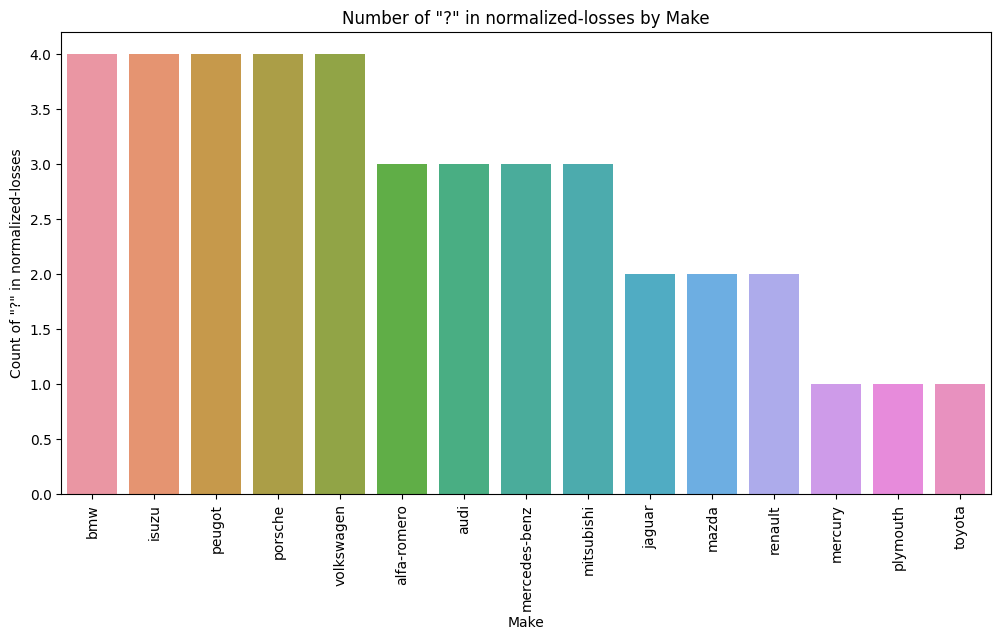

In [9]:
# Filter the DataFrame to include only '?' values in the 'normalized-losses' column
question_marks = automobile_df[automobile_df['normalized-losses'] == '?']

# Count the number of '?' values for each 'make'
question_mark_counts = question_marks['make'].value_counts()

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=question_mark_counts.index, y=question_mark_counts.values)
plt.xlabel('Make')
plt.ylabel('Count of "?" in normalized-losses')
plt.title('Number of "?" in normalized-losses by Make')
plt.xticks(rotation=90)
plt.show()

No evidence showing supporting it, so we may keep the data and replace them into median value instead of dropping them.

#### Handing missing values &  changing data types:

There are different methods to handle the msising data,
In this case, I will first turn them into NaN first then I will:

1.) Replace with median values (Numerical data)


2.) Replace with mode values/convert into a new group:unknown (Categorical data)



Replace the '?' values with NaN, as  value of '?' in the columns cannot be converted to integers or make erros on analysis, missingno matrix was created to see the missing values:

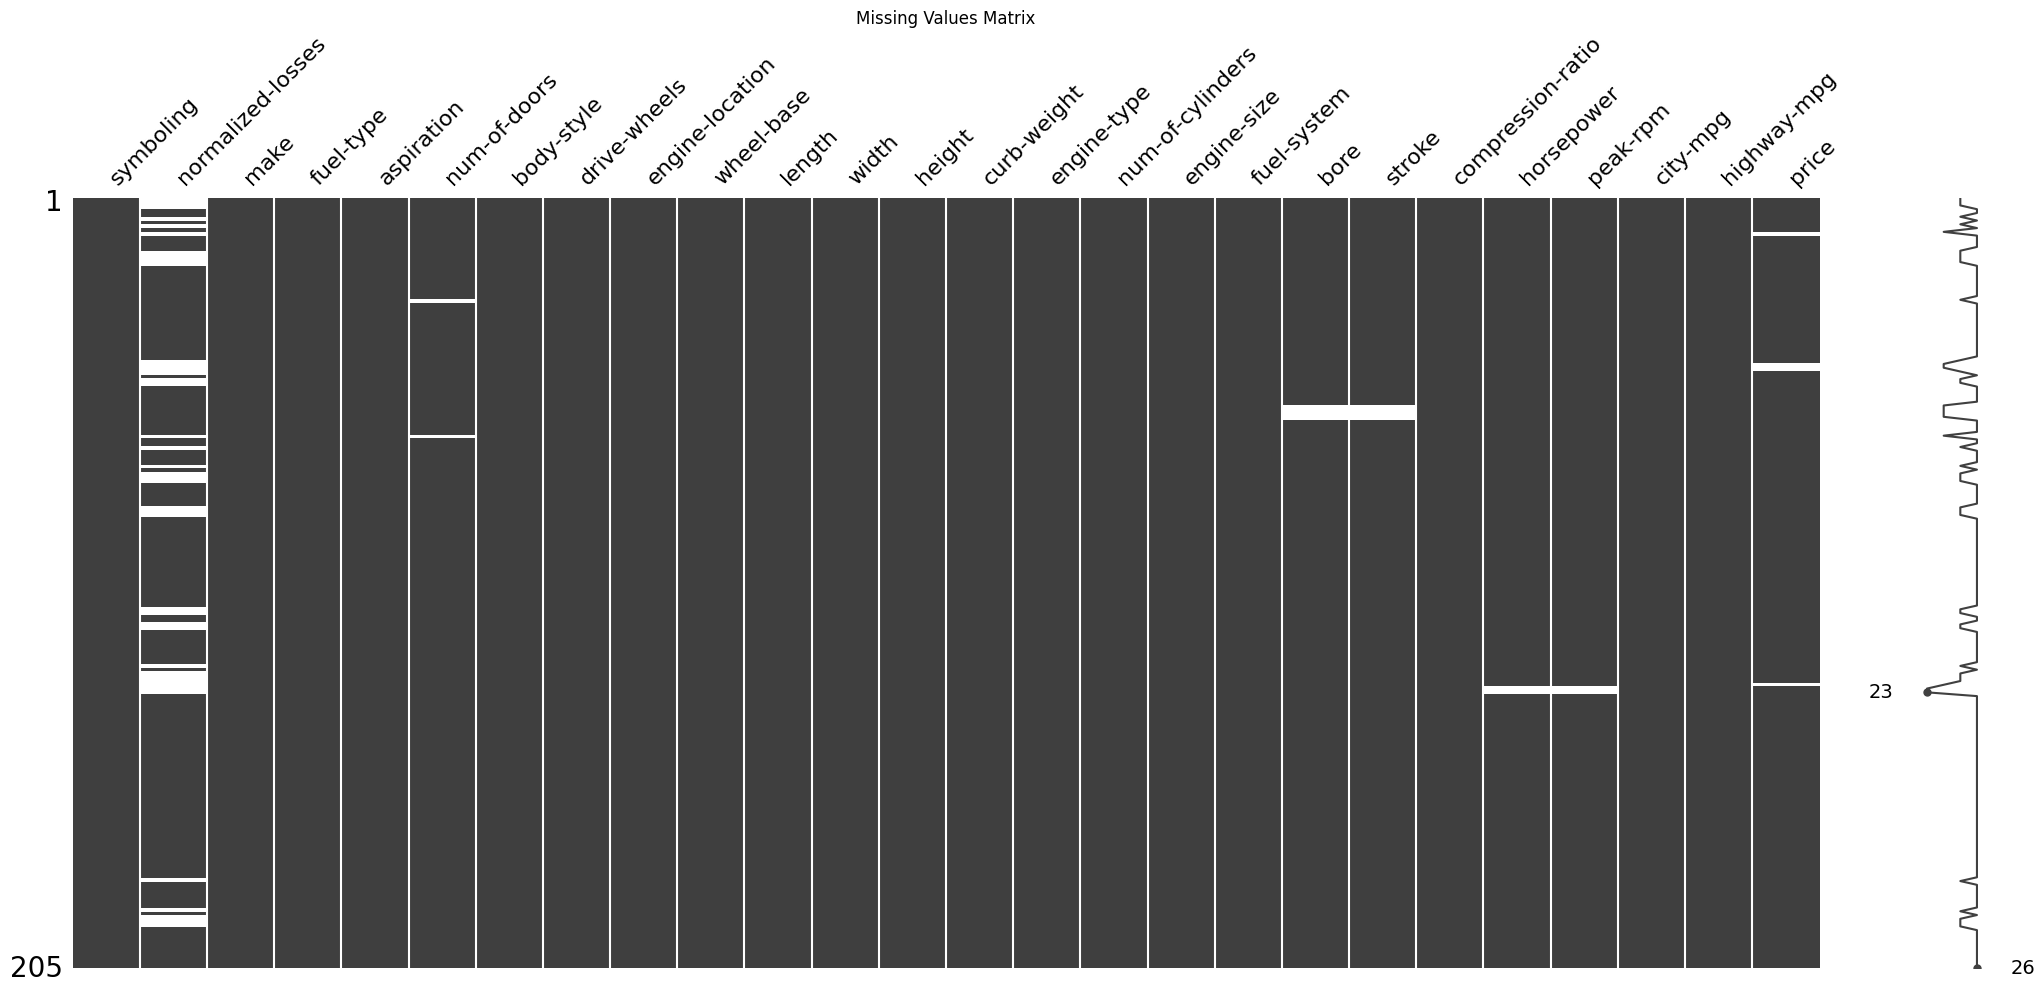

In [10]:
# Replace "?" with NaN
automobile_df.replace('?', np.nan, inplace=True)

# Visualize missing values using missingno matrix
msno.matrix(automobile_df)
plt.title('Missing Values Matrix')
plt.show()

#### 1.) Replace with median values (Numerical data):

Replacing all the missing values in the columns of numerical data with their median:

(In this step, the object in muerical data will also be converted to float)

The missing values of the colum 'normalized-losses' is about 20% (41/205), we will not drop it but convert them into median to have a overview of the correlation.

In [11]:
# Calculate the median
# Replace NaN with the median value
cols = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
for col in cols:
    automobile_df[col] = pd.to_numeric(automobile_df[col])
    median_value = automobile_df[col].median()  
    automobile_df[col].fillna(median_value, inplace=True)  

#### 2.) Replace with a new category called unknown (Categorical data):

For num-of-doors [categorical], I will change the missing values inito a new group called unknown instead of converting them into mode:

In [12]:
# Replace NaN values with 'unknown'
automobile_df['num-of-doors'].fillna('unknown', inplace=True)

Checking the null data and the data type again:

(All null data should be cleaned and all the data types should be casted correctly)

In [13]:
automobile_df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [14]:
automobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

### Now onto the exploration

#### Identify relationships between variables (features)

The main goal here is to identify and create relationships that can help formulate ideas.

#### Data meaning

symboling [Numerical]: risk rating or insurance rating assigned to a vehicle. It indicates the level of risk associated with the car in terms of its potential for accidents, theft, or other risks. Typically, symboling values range from -3 to +3, where a higher positive value indicates a lower risk rating.  

normalized-losses [Numerical]: the average amount paid by an insurance company for claims on a particular vehicle model. 

wheel-base [Numerical]: the distance between the centers of the front and rear wheels of a vehicle. A crucial parameter that affects vehicle stability, handling, and interior space.

fuel-system [Categorical]: the mechanism and components involved in supplying fuel to the engine.

bore [Numerical]: the diameter of the cylinders in an internal combustion engine. A crucial parameter that affects the engine's displacement, performance, and power output

stroke [Numerical]: the distance traveled by the piston in a single movement inside the cylinder.Stroke length, along with bore size, determines the engine's displacement and affects its power, torque, and efficiency

compression-ratio [Numerical]: the ratio of the volume of the combustion chamber at the bottom dead center (BDC) to the volume at the top dead center (TDC) in an internal combustion engine. It indicates the degree of compression of the air-fuel mixture before combustion. A higher compression ratio typically results in improved engine efficiency and performance.

peak-rpm [Numerical]: the engine speed or revolutions per minute (RPM) at which the maximum power output is achieved. The highest rotational speed at which the engine can operate efficiently and generate the most power.

make [Categorical]: manufacturing company

fuel-type [Categorical]: fuel type of automobile

aspiration [Categorical]: draws air into the engine cylinders

num-of-doors [Categorical]: number of doors

body-style [Categorical]: shape of automobile

drive-wheels [Categorical]: essentially dictates the traction of the cars

engine-location [Categorical]: engine location

length [Numerical]: length of automobile

width [Numerical]: width of automobile

height [Numerical]: height of automobile

curb-weight [Numerical]: the weight of an automobile without occupants or baggage

engine-type [Categorical]: vehicle states how the engine is assembled or designed in terms of operations of valves and cylinders. :In this dataset we have seven engine types dohc (Dual OverHead Cam),dohcv (Dual OverHead Cam and Valve),l (L engine),ohc (OverHead Cam),ohcf (OverHead Cam and Valve F engine),ohcv (OverHead Cam and Valve) ,rotor (Rotary engine)

num-of-cylinders [Categorical]: related to how the engine works, where generally more cylinders mean more potential power

engine-size [Numerical]: engine size of automobile

horsepower [Numerical]: horsepower measures the amount of power produced by the engine

city-mpg [Numerical]: fuel consumption in city by mpg (miles per gallon) unit

highway-mpg [Numerical]: fuel consumption in highway by mpg (miles per gallon) unit

price [Numerical]: price of automobile

From above information, we have numerical data x 16 columns and categorical data x 10 columns

<font size="3"><strong>General statistics of the dataset</strong></font>

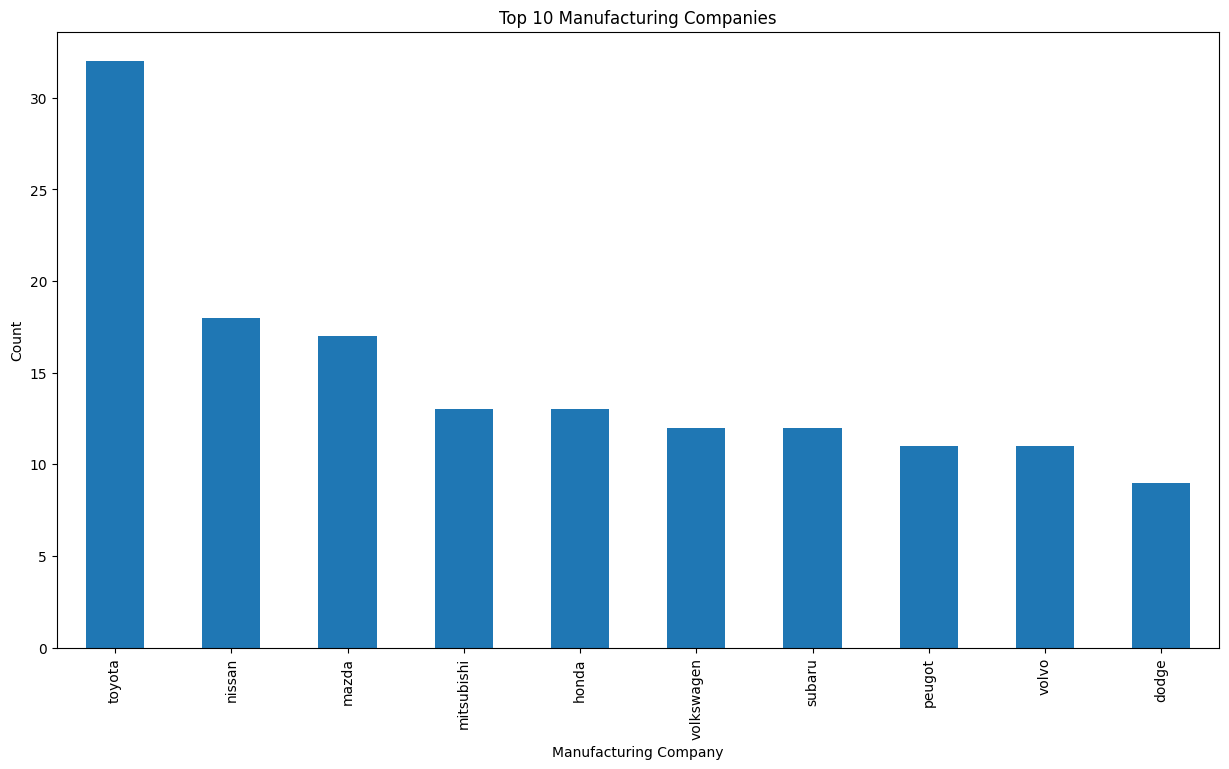

In [15]:
fig, ax = plt.subplots(figsize=(15, 8))
automobile_df["make"].value_counts().head(10).plot.bar(ax=ax)
plt.title("Top 10 Manufacturing Companies")
plt.xlabel("Manufacturing Company")
plt.ylabel("Count")

plt.show()

Toyota is the leading manufacturing company for production in the dataset. Nissan and Mazda complete the top three.

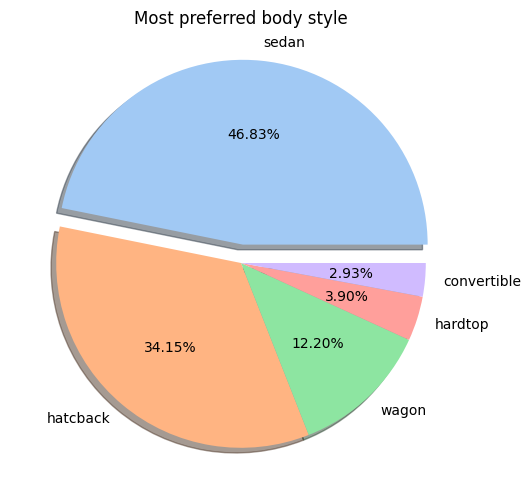

In [16]:
body = ['sedan', 'hatcback', 'wagon',
        'hardtop', 'convertible']
 
data = automobile_df["body-style"].value_counts()
explode = (0.1, 0.0, 0.0, 0.0, 0.0)
fig = plt.figure(figsize =(13, 6))
colors = sns.color_palette("pastel")[0:len(body)]
plt.pie(data, labels = body,explode=explode,autopct='%1.2f%%', shadow=True,colors=colors)
plt.title("Most preferred body style");

Sedan is the dominant body style of the cars in our dataset.

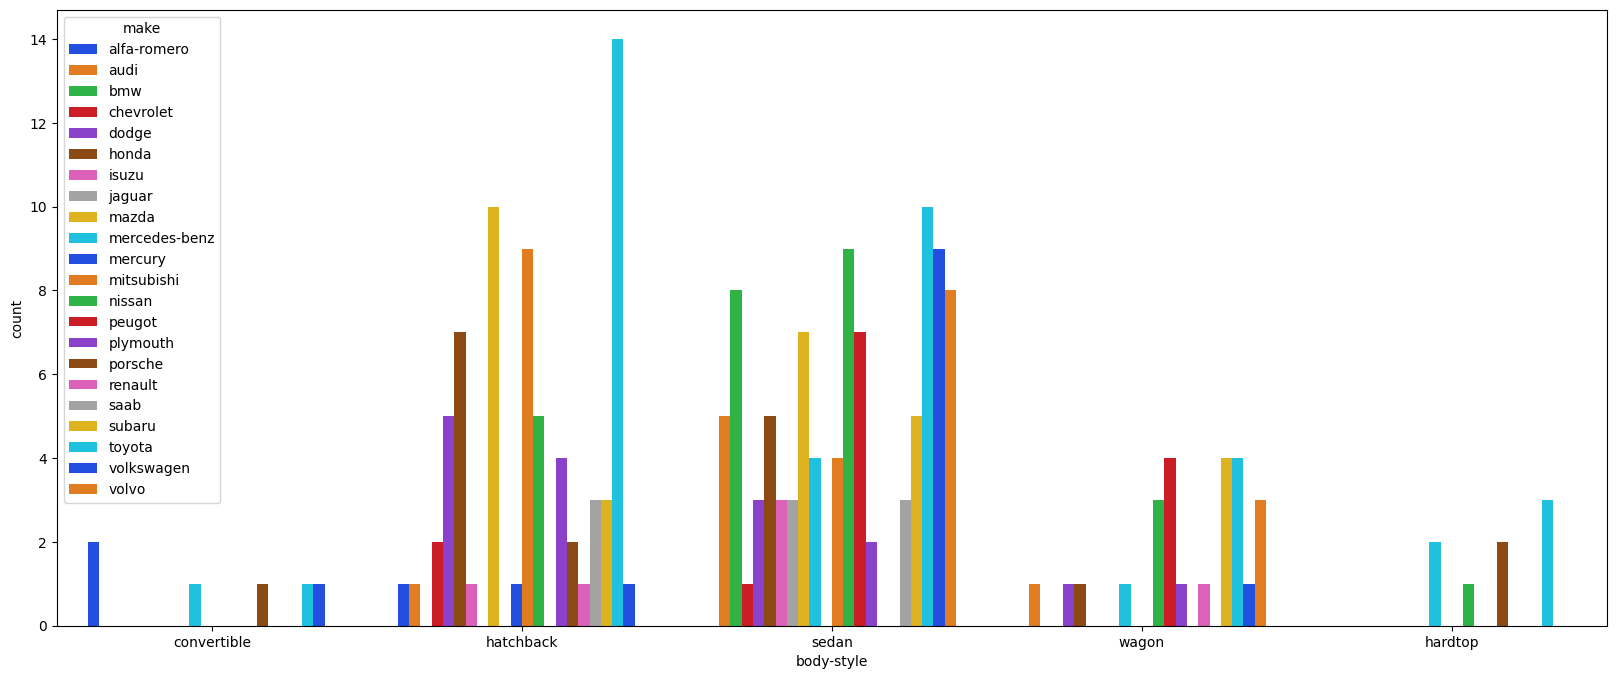

In [17]:
fig, ax = plt.subplots(figsize=(20,8))
sns.countplot(x='body-style', data=automobile_df, orient='h',hue='make',ax=ax,palette='bright');

 Toyota had the most cars with sedan body style produced in the dataset, followed by Volkswagen and Nissan.

Fuel type used by the cars in the dataset:

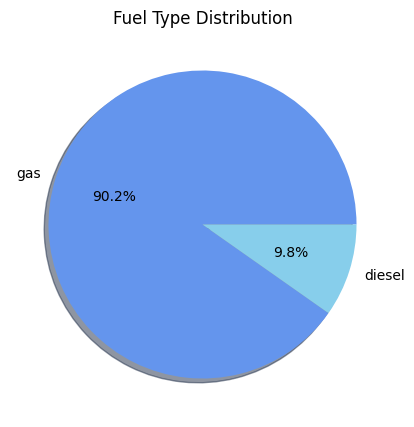

In [18]:
colors = ["#6495ED", "skyblue"]

f, ax = plt.subplots(figsize=(5, 5))
automobile_df['fuel-type'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax, colors=colors, shadow=True)
plt.title('Fuel Type Distribution')
plt.ylabel('')
plt.show()

For EDA, even though sometimes we are blindly finding some insights without a clue, we most of times are interested on any variables related to money (afterall we business is about money). Besides,the efficiency and power of engine for the automobiles are also important outcomes the manufacture company would like to know what variables could promote them.

1.)  price, 2.)city-mpg, 3.) highway-mpg, 4.) horsepower, 5.) normalized-losses and 6.)symboling</strong> are the variables we would like to explore what other variables could affect them.



Overview of the range of the variables (1-6):

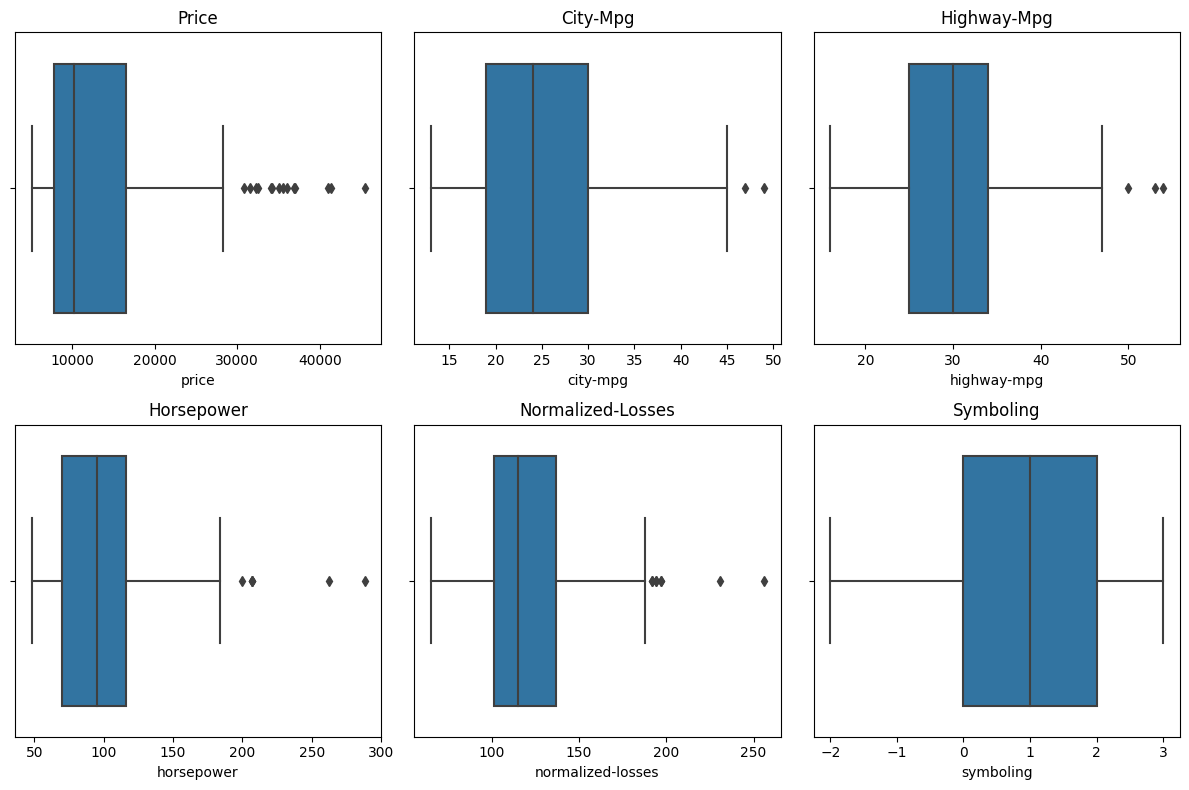

In [19]:
# Specify the columns for boxplot
columns = ['price', 'city-mpg','highway-mpg','horsepower','normalized-losses','symboling']

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# Flatten axes for easier iteration
axes = axes.flatten()

# Iterate over columns and create boxplots
for i, column in enumerate(columns):
    sns.boxplot(x=column, data=automobile_df,  ax=axes[i])
    axes[i].set_title(column.title())

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

The boxplots above give us an idea how many outliers are there.

#### Heatmap (for numerical data):

Overview of the correlationship between numerical variables

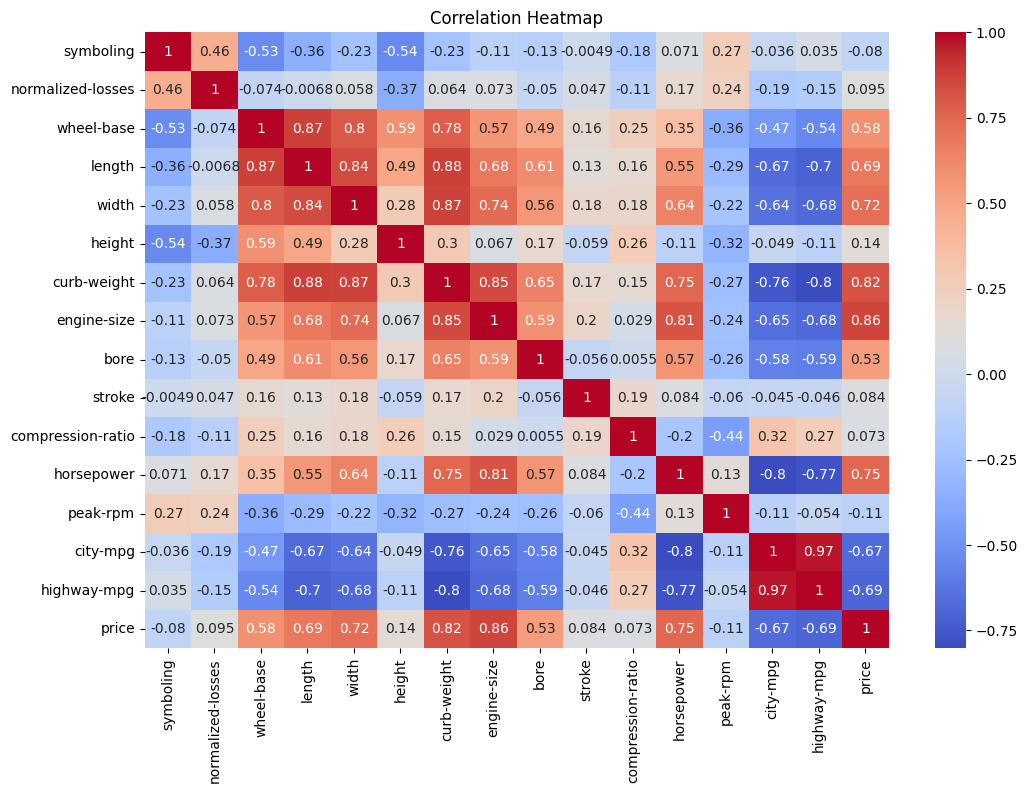

In [20]:
# Calculate the correlation matrix for all columns
correlation_matrix = automobile_df.corr()

# Create a heatmap using the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

From the heatmap above, we can have a general idea what are the correlationships among the numerical variables.
Then we can explore more by visualisation in the individual relationship we are interested.

#### 1.) Price

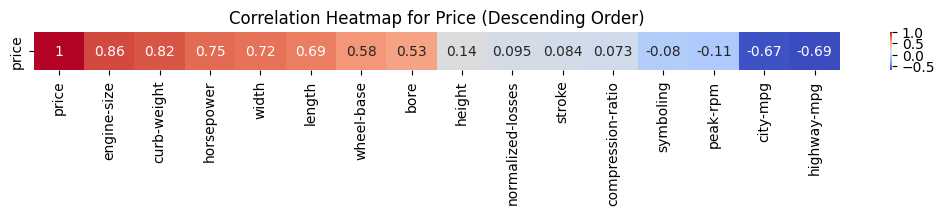

In [21]:
# Calculate the correlation matrix for all columns
correlation_matrix = automobile_df.corr()

# Select only the row that shows the correlation of other variables with 'price'
price_correlations = correlation_matrix.loc['price', :]

# Sort the correlations in descending order
price_correlations_sorted = price_correlations.sort_values(ascending=False)

# Create a new DataFrame with only the sorted 'price' correlations
price_correlation_df = pd.DataFrame(price_correlations_sorted).T

# Create a heatmap using the price correlation DataFramea
plt.figure(figsize=(13, 0.5))
sns.heatmap(price_correlation_df, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Price (Descending Order)')
plt.show()

When we think of price is an dependent variable and others are independent variables, there are strong correlation with <strong>engine size :0.86, curb-weight:0.82, horsepower:0.75, width:0.72, length:0.69, highway-mpg:-0.69,city-mpg:-0.67.</strong>

Curb-weight,width,length are not the parameters we are interested as they may be varying because of different size of engine (we can see there is strong correlation between them and engine-size: 0.85, 0.74, 0.68)

ie: Bigger engine need larger curb-weight, width and length of the automobile to install the engine.
But because the curb-weight has the strongest correlation, we will still explore it .

Correlation values reference:

In [22]:
correlations = automobile_df.corr()['price']

p_values = []
r_squared_values = []
columns = []
correlation_coefficients = []

for column in automobile_df.drop('price', axis=1).columns:
    if automobile_df[column].dtype != object:
        mask = ~np.isnan(automobile_df['price']) & ~np.isnan(automobile_df[column])
        y = automobile_df['price'][mask]
        x = automobile_df[column][mask]

        model = sm.OLS(x, sm.add_constant(y))
        results = model.fit()
        p_values.append(results.pvalues[1])
        r_squared_values.append(results.rsquared)
        columns.append(column)
        correlation_coefficients.append(correlations[column])

results_df = pd.DataFrame({'Column': columns, 'Correlation': correlation_coefficients, 'p-value': p_values, 'R-squared': r_squared_values})

print(results_df)

               Column  Correlation       p-value  R-squared
0           symboling    -0.080149  2.532966e-01   0.006424
1   normalized-losses     0.095489  1.732144e-01   0.009118
2          wheel-base     0.584847  3.338017e-20   0.342046
3              length     0.686567  6.428844e-30   0.471375
4               width     0.724558  1.178970e-34   0.524985
5              height     0.140439  4.459578e-02   0.019723
6         curb-weight     0.819817  4.794551e-51   0.672099
7         engine-size     0.860343  2.511194e-61   0.740190
8                bore     0.532861  1.964025e-16   0.283941
9              stroke     0.083627  2.332119e-01   0.006993
10  compression-ratio     0.072890  2.989755e-01   0.005313
11         horsepower     0.749919  2.770149e-38   0.562379
12           peak-rpm    -0.107283  1.257478e-01   0.011510
13           city-mpg    -0.668822  6.034975e-28   0.447322
14        highway-mpg    -0.693037  1.131042e-30   0.480301


#### Engine-size, curb-weight and horsepower (Numerical variables):

<AxesSubplot:xlabel='horsepower', ylabel='price'>

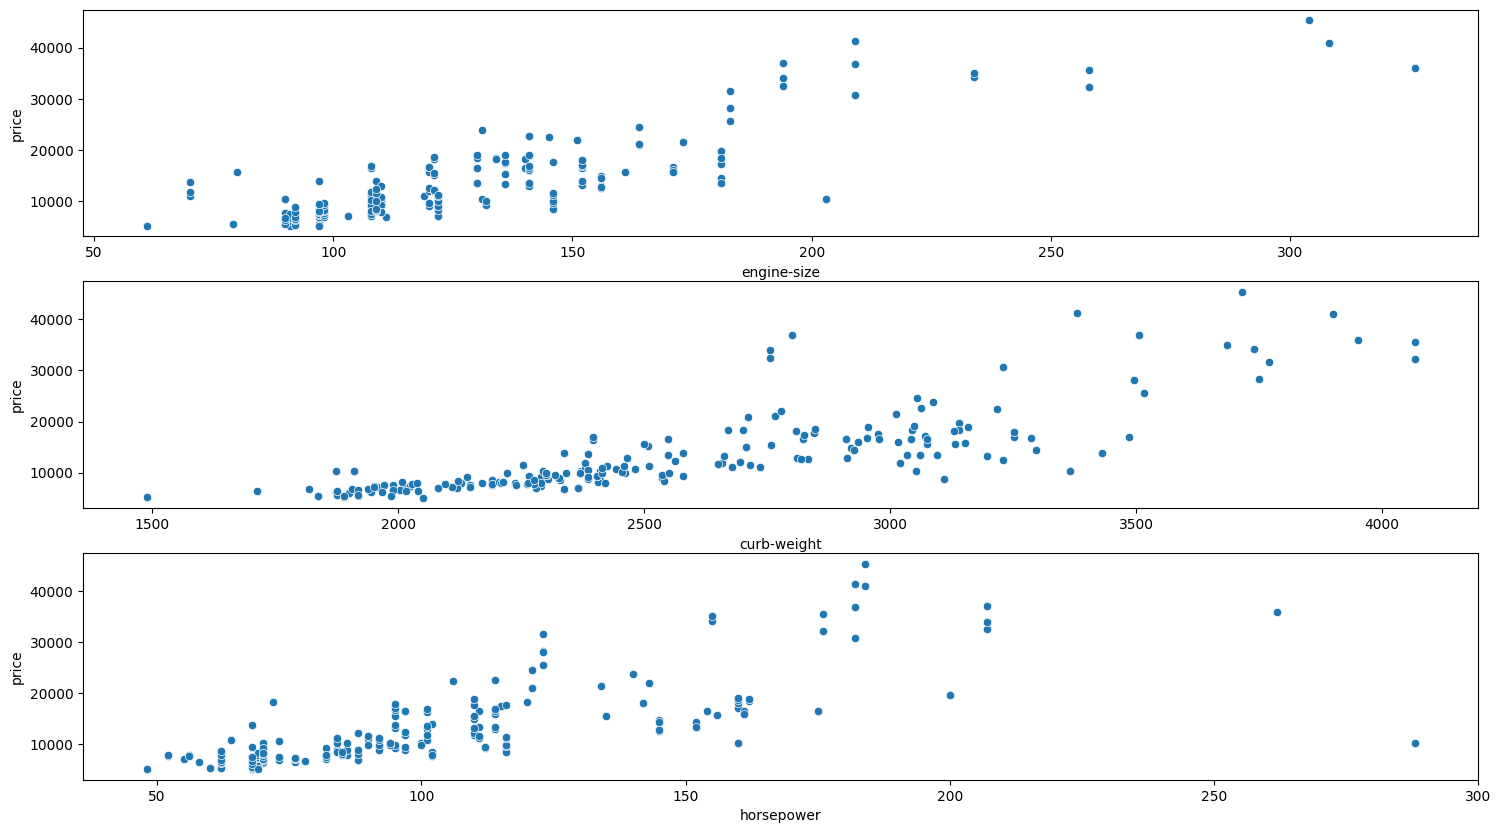

In [23]:
fig, axs = plt.subplots(3,  figsize=(18, 10))

# Create scatterplots of the variables with price
sns.scatterplot(x=automobile_df['engine-size'], y=automobile_df['price'], ax=axs[0])
sns.scatterplot(x=automobile_df['curb-weight'], y=automobile_df['price'], ax=axs[1])
sns.scatterplot(x=automobile_df['horsepower'], y=automobile_df['price'], ax=axs[2])

The engine-size, curb-weight and horsepower variables are similarly related to the price variable, they all have strong positive correlation. This makes sense, since engine size is directly related to car weight and horsepower as well (apart from the width and length I mentioned above). We can say that these variables explain the price variable quite well.

#### Categorical variables:

In [24]:
# Select the categorical columns to include in the correlation calculation
categorical_columns = ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']

# Create a new dataframe with only the selected columns
selected_columns_df = automobile_df[['price'] + categorical_columns]

# Perform one-hot encoding on the categorical columns
encoded_df = pd.get_dummies(selected_columns_df, columns=categorical_columns)

# Compute the correlation matrix
correlation_matrix = encoded_df.corr()

# Extract the correlations between 'price' and other columns, sorted in descending order
price_correlations = correlation_matrix['price'].sort_values(ascending=False)

# Display the correlations as a table
correlation_table = price_correlations.to_frame().style.background_gradient(cmap='coolwarm')
correlation_table

,price
price,1.000000
drive-wheels_rwd,0.633080
make_mercedes-benz,0.525508
fuel-system_mpfi,0.503366
num-of-cylinders_six,0.487449
num-of-cylinders_eight,0.402909
engine-type_ohcv,0.395552
make_jaguar,0.332575
make_bmw,0.332494
engine-location_rear,0.331459


From above correlation table, we can see that <strong>drive-wheels_rwd:0.633080 make_mercedes-benz:0.525508 fuel-system_mpfi:0.503366</strong> made an expensive automobile.

While <strong>fuel-system_2bbl:-0.493613, drive-wheels_fwd:-0.587752, num-of-cylinders_four:-0.673478 </strong>made a cheaper automobile.

In [25]:
# Calculate the means of the price in different groups of variables
make_mean = automobile_df.groupby(["make"])["price"].mean().sort_values(ascending=False)
fuel_type_mean = automobile_df.groupby(["fuel-type"])["price"].mean().sort_values(ascending=False)
aspiration_mean = automobile_df.groupby(["aspiration"])["price"].mean().sort_values(ascending=False)
doors_mean = automobile_df.groupby(["num-of-doors"])["price"].mean().sort_values(ascending=False)
body_style_mean = automobile_df.groupby(["body-style"])["price"].mean().sort_values(ascending=False)
drive_wheels_mean = automobile_df.groupby(["drive-wheels"])["price"].mean().sort_values(ascending=False)
engine_location_mean = automobile_df.groupby(["engine-location"])["price"].mean().sort_values(ascending=False)
engine_type_mean = automobile_df.groupby(["engine-type"])["price"].mean().sort_values(ascending=False)
num_of_cylinders_mean = automobile_df.groupby(["num-of-cylinders"])["price"].mean().sort_values(ascending=False)
fuel_system_mean = automobile_df.groupby(["fuel-system"])["price"].mean().sort_values(ascending=False)

<AxesSubplot:xlabel='fuel-system', ylabel='price'>

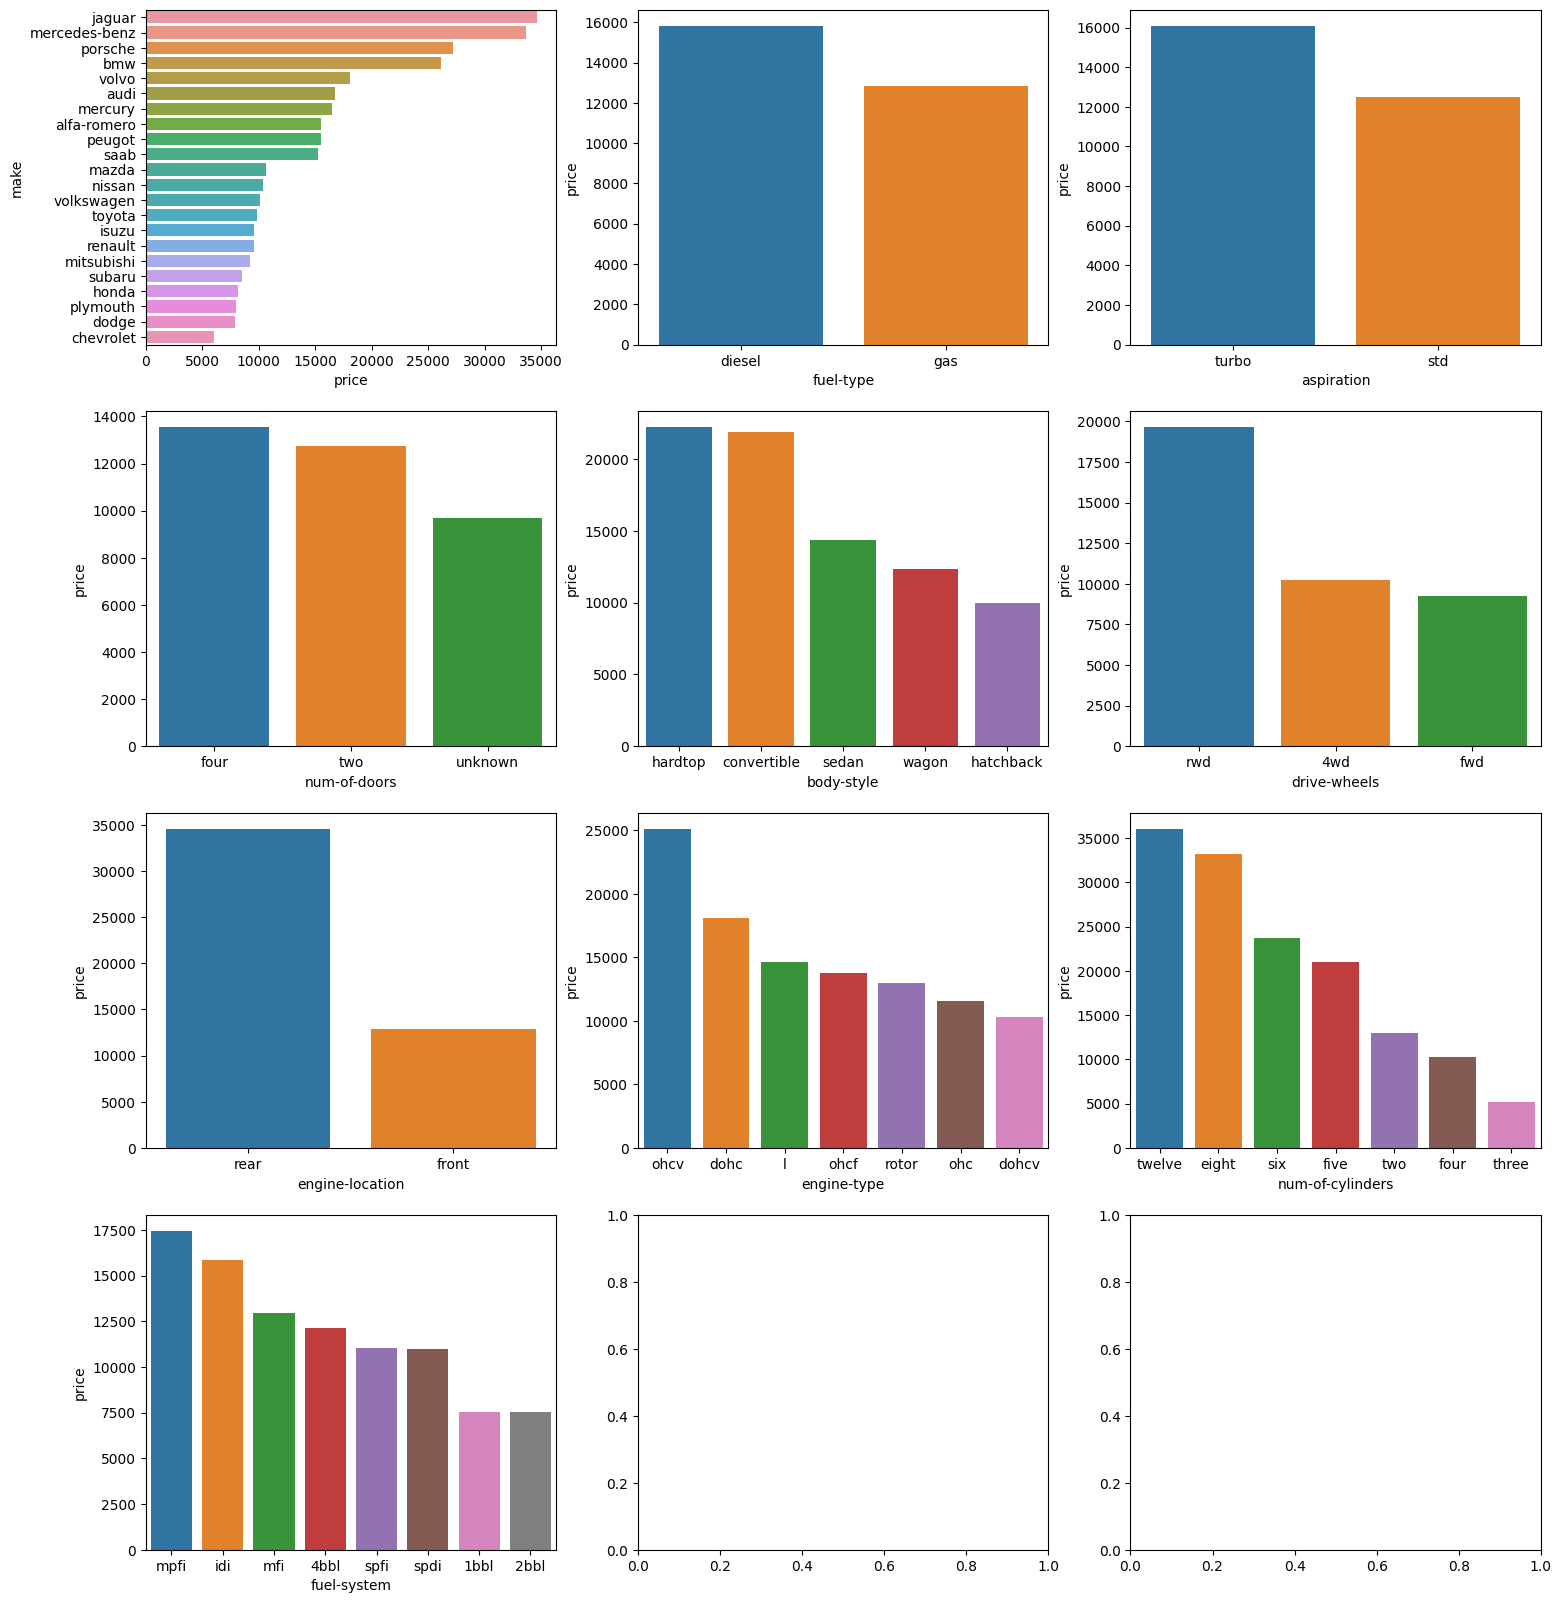

In [26]:
# Plot bar charts for to compare the pirce of the groups in different variables
fig, axs = plt.subplots(4, 3,  figsize=(18, 20))
sns.barplot(x = make_mean, y = make_mean.index, ax=axs[0, 0]) 
sns.barplot(y = fuel_type_mean, x = fuel_type_mean.index, ax=axs[0, 1]) 
sns.barplot(y = aspiration_mean,x =  aspiration_mean.index, ax=axs[0, 2]) 
sns.barplot(y = doors_mean,x =  doors_mean.index, ax=axs[1, 0]) 
sns.barplot(y = body_style_mean, x = body_style_mean.index, ax=axs[1, 1]) 
sns.barplot(y = drive_wheels_mean, x = drive_wheels_mean.index, ax=axs[1, 2]) 
sns.barplot(y = engine_location_mean, x = engine_location_mean.index, ax=axs[2, 0]) 
sns.barplot(y =engine_type_mean,x =  engine_type_mean.index, ax=axs[2, 1]) 
sns.barplot(y =num_of_cylinders_mean, x = num_of_cylinders_mean.index, ax=axs[2, 2]) 
sns.barplot(y =fuel_system_mean, x = fuel_system_mean.index, ax=axs[3, 0]) 

In the graphs we can see the average car price for each categorical variable. In some cases, price has little difference among the categories such as num-of-doors. In some cases there are categories standing out with high price:

Make (top 3): jaguar, mercedez-ben and porsche

Fuel-type: diesel

Aspiration: turbo

Num-of-doors: four

Body-style: hardtop and convertible

Drive-wheels: rwd

Engine-location: rear

Engine-type: dohcv

Num-of-cylinders: eight and twelve

Fuel-system: mpfi and idi

#### 2.)City-mpg, 3.) Highway-mpg 

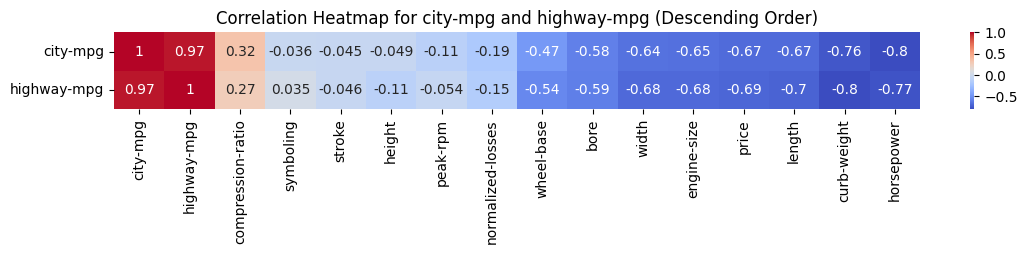

In [27]:
# Calculate the correlation matrix for all columns
correlation_matrix = automobile_df.corr()

# Select only the correlations for 'city-mpg' and 'highway-mpg'
selected_correlations = correlation_matrix.loc[['city-mpg', 'highway-mpg'], :]

# Sort the correlations in descending order
selected_correlations_sorted = selected_correlations.sort_values(by=['city-mpg', 'highway-mpg'], axis=1, ascending=False)

# Create a new DataFrame with the selected and sorted correlations
selected_correlation_df = pd.DataFrame(selected_correlations_sorted)

# Create a heatmap using the selected and sorted correlation DataFrame
plt.figure(figsize=(13, 1))
sns.heatmap(selected_correlation_df, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for city-mpg and highway-mpg (Descending Order)')
plt.show()

For numerical variables, we can observe the <strong>high the horsepower, curb-weight, size(engine-size, length,width, bore, wheel-base), price they are, the less fuel efficient they will be (negative correlation)</strong>. 
So <strong> smaller engine (-0.68), smaller curb-weight:-0.8, length:-0.7, width:-0.68 even cheaper automobile:-0.69 had higher fuel efficient</strong>.

However, we are more interested on the <strong>positive correlation(compression-ratio:0.32 and 0.27)</strong>
A high compression ratio is desirable because it allows an engine to extract more mechanical energy from a given mass of air–fuel mixture due to its higher thermal efficiency. So it makes sense.

Categorical variables:

In [28]:
# Select the categorical columns to include in the correlation calculation
categorical_columns = ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']

# Create a new dataframe with only the selected columns, excluding 'peak-rpm'
selected_columns_df = automobile_df[['city-mpg', 'highway-mpg'] + categorical_columns]

# Perform one-hot encoding on the categorical columns
encoded_df = pd.get_dummies(selected_columns_df, columns=categorical_columns)

# Compute the correlation matrix
correlation_matrix = encoded_df.corr()

# Extract the correlations between 'city-mpg' and 'highway-mpg' and other columns
city_mpg_correlations = correlation_matrix['city-mpg']
highway_mpg_correlations = correlation_matrix['highway-mpg']

# Sort the correlations in descending order
city_mpg_correlations_sorted = city_mpg_correlations.sort_values(ascending=False)
highway_mpg_correlations_sorted = highway_mpg_correlations.sort_values(ascending=False)

# Combine the sorted correlations into a single DataFrame
correlations_df = pd.concat([city_mpg_correlations_sorted, highway_mpg_correlations_sorted], axis=1)
correlations_df.columns = ['City MPG', 'Highway MPG']

# Display the correlations in descending order as a table
descending_correlation_table = correlations_df.style.background_gradient(cmap='coolwarm')
descending_correlation_table


,City MPG,Highway MPG
city-mpg,1.000000,0.971337
highway-mpg,0.971337,1.000000
drive-wheels_fwd,0.563879,0.600828
num-of-cylinders_four,0.541267,0.547326
fuel-system_2bbl,0.520751,0.528009
engine-type_ohc,0.391236,0.426049
make_chevrolet,0.294678,0.276426
fuel-system_idi,0.255963,0.191392
fuel-type_diesel,0.255963,0.191392
num-of-cylinders_three,0.233665,0.226756


MPG is about the fuel efficient. We can see that the factors of <strong>drive-wheels_fwd:0.563879 and 0.600828, num-of-cylinders_four:0.541267 and 0.547326, fuel-system_2bbl:0.520751 and 0.528009, engine-type_ohc:0.391236 and 0.426049</strong> have positive correlation with the fuel efficient.

While <strong>engine-type_ohcv:-0.336926 and -0.360616, num-of-cylinders_six:-0.386551 and -0.366696, drive-wheels_rwd:-0.545789 and -0.566149, fuel-system_mpfi:-0.644489 and -0.610813</strong> have negative impact on the fuel efficient.
                
<strong>Drive-wheels,num-of-cylinders,fuel-system,engine-type </strong> become the 4 factors we would like to explore the relationship with MPG. We also have a look the fuel efficent while using <strong>diesel and gas.</strong>

fwd drive-wheels showed the best fuel efficient on both gas and diesel:

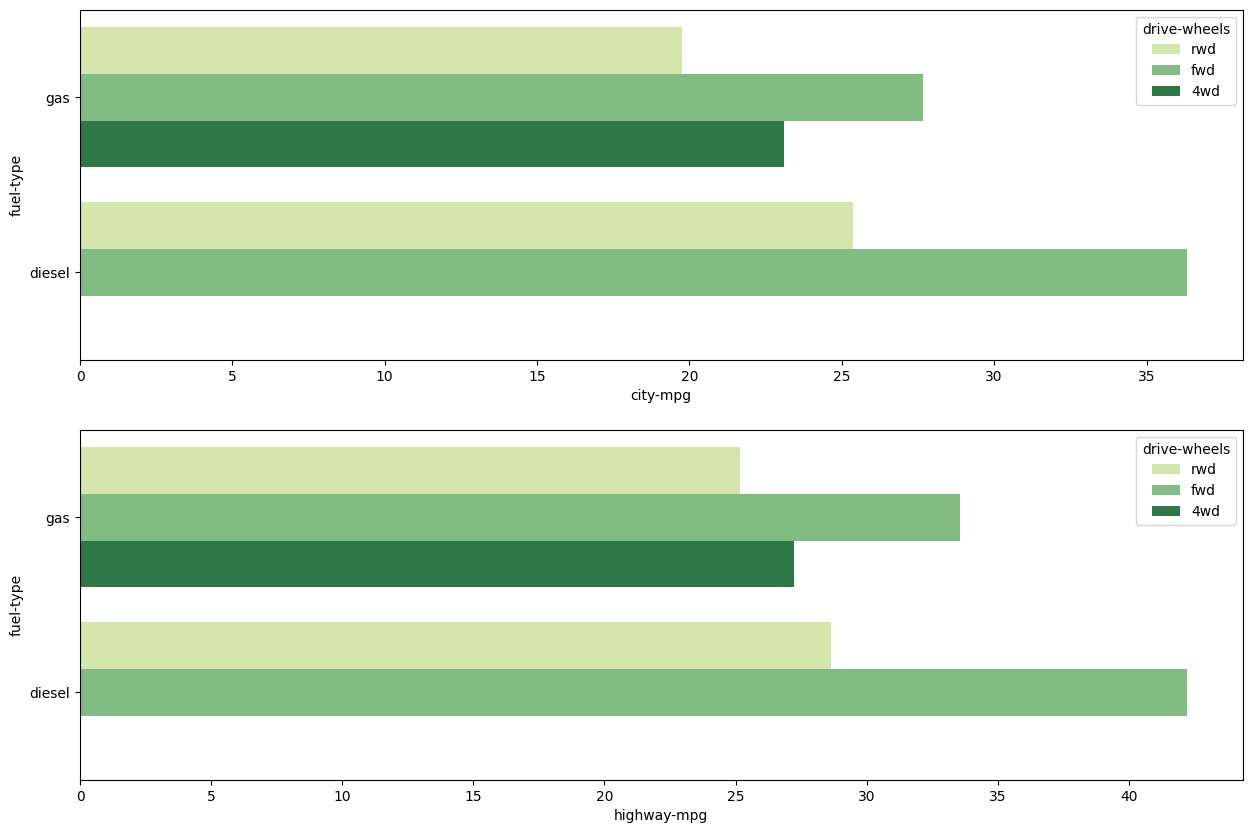

In [29]:
fig, axs = plt.subplots(2, 1, figsize=(15, 10))

sns.barplot(data=automobile_df, x="city-mpg", y="fuel-type", palette='YlGn', hue="drive-wheels", ax=axs[0], errorbar=None)
sns.barplot(data=automobile_df, x="highway-mpg", y="fuel-type", palette='YlGn', hue="drive-wheels", ax=axs[1], errorbar=None)

plt.show()

Fiver cylinders showed a high fuel efficient but it only exists for gas, while automobile with four cylinders have the highest efficient:

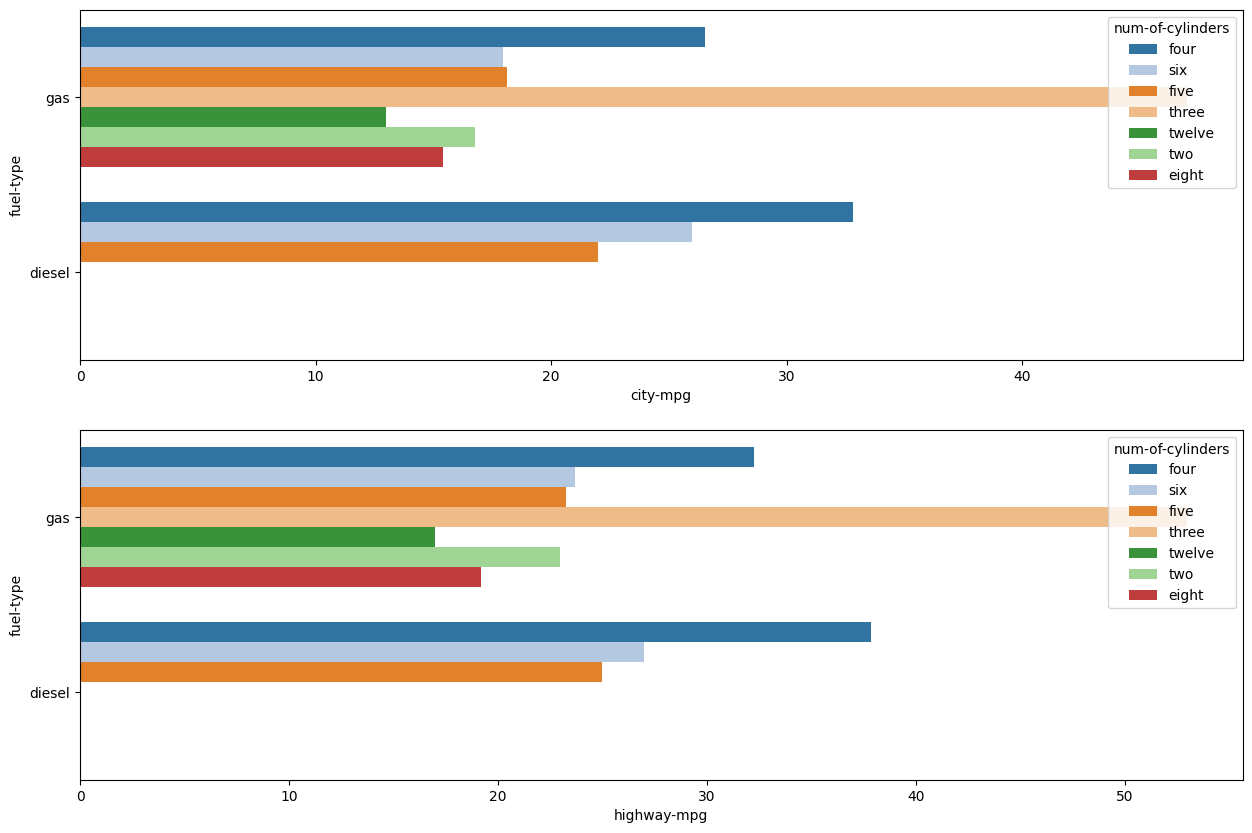

In [30]:
fig, axs = plt.subplots(2, 1, figsize=(15, 10))

sns.barplot(data=automobile_df, x="city-mpg", y="fuel-type", palette='tab20', hue="num-of-cylinders", ax=axs[0], errorbar=None)
sns.barplot(data=automobile_df, x="highway-mpg", y="fuel-type", palette='tab20', hue="num-of-cylinders", ax=axs[1], errorbar=None)

plt.show()

2bbl and 1bbl provided high fuel efficient for the automobile using gas:

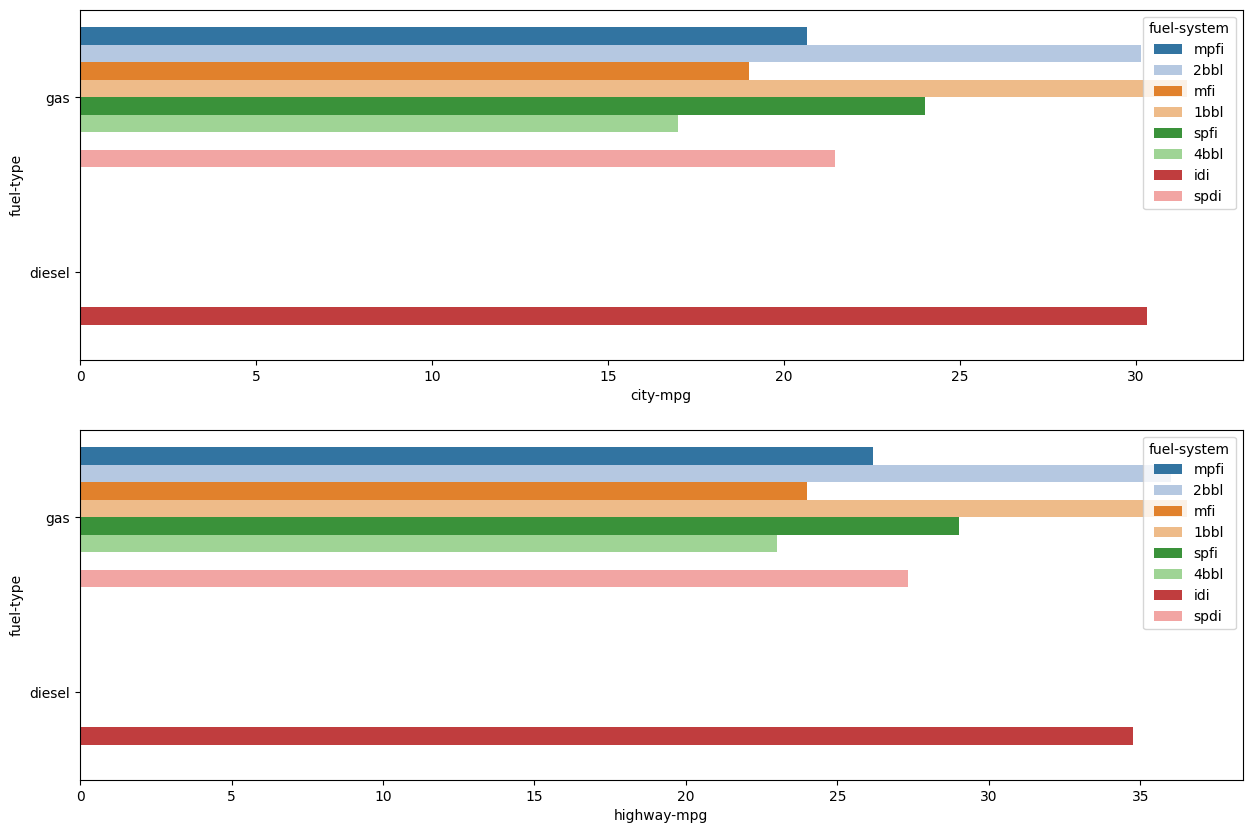

In [31]:
fig, axs = plt.subplots(2, 1, figsize=(15, 10))

sns.barplot(data=automobile_df, x="city-mpg", y="fuel-type", palette='tab20', hue="fuel-system", ax=axs[0], errorbar=None)
sns.barplot(data=automobile_df, x="highway-mpg", y="fuel-type", palette='tab20', hue="fuel-system", ax=axs[1], errorbar=None)

plt.show()

ohc engine provided highest fuel efficient for both gas and diesel automobile:

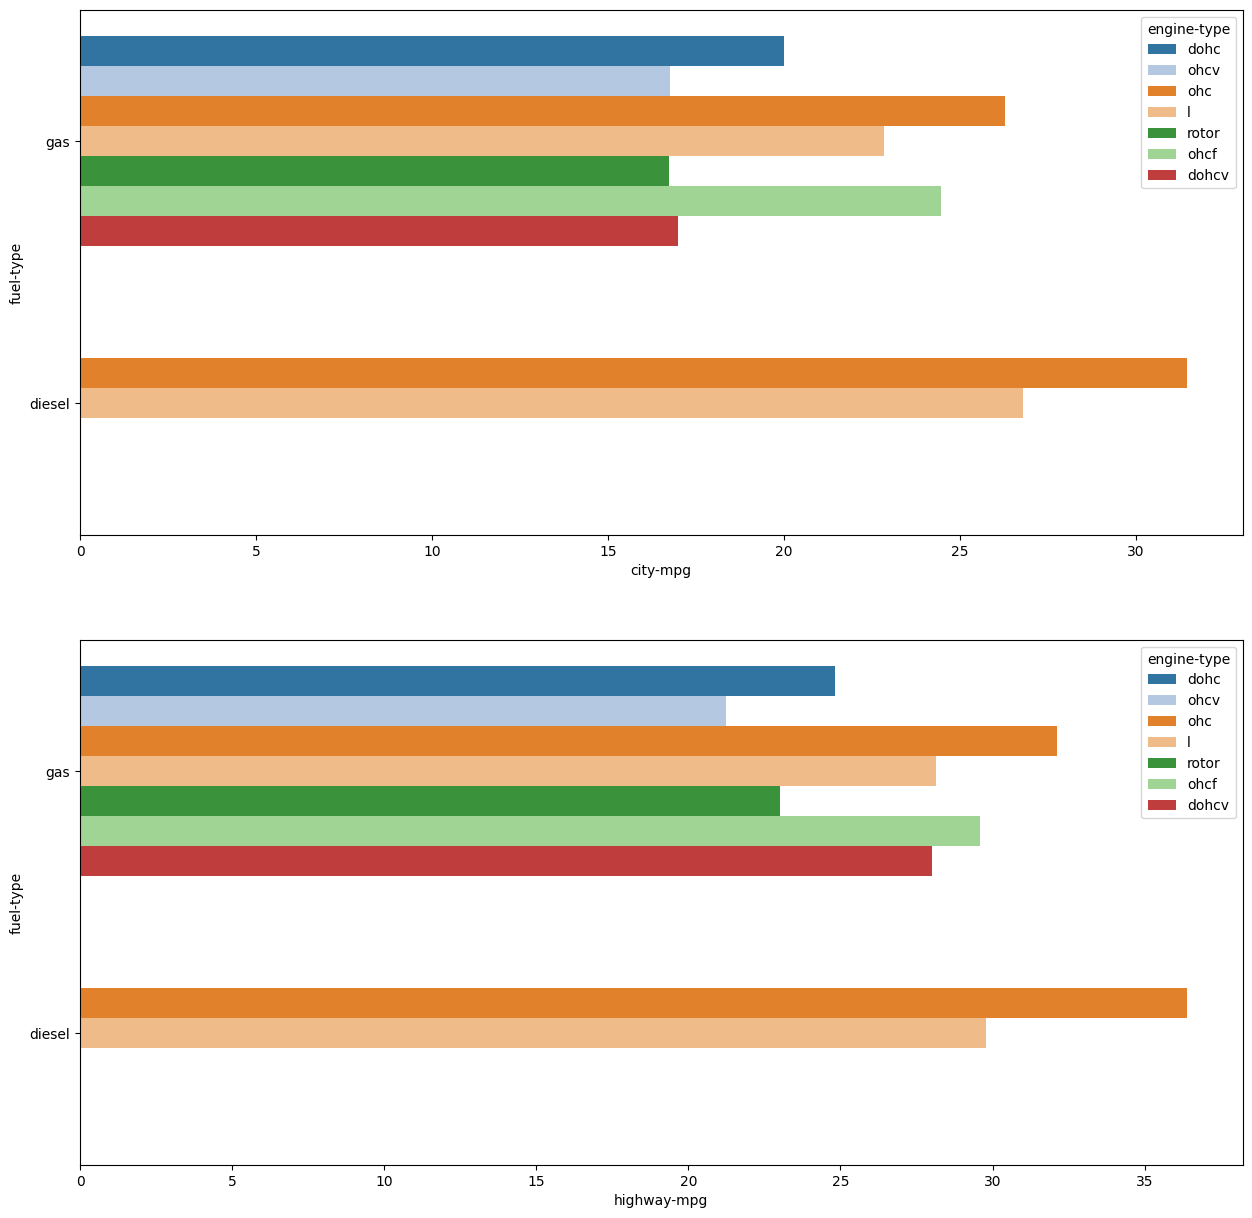

In [32]:
fig, axs = plt.subplots(2, 1, figsize=(15, 15))

sns.barplot(data=automobile_df, x="city-mpg", y="fuel-type", palette='tab20', hue="engine-type", ax=axs[0], errorbar=None)
sns.barplot(data=automobile_df, x="highway-mpg", y="fuel-type", palette='tab20', hue="engine-type", ax=axs[1], errorbar=None)

plt.show()

#### 4.) Horsepower

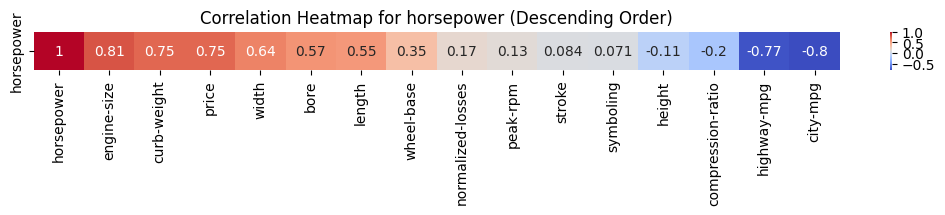

In [33]:
# Calculate the correlation matrix for all columns
correlation_matrix = automobile_df.corr()

# Select only the row that shows the correlation of other variables with 'horsepower'
horsepower_correlations = correlation_matrix.loc['horsepower', :]

# Sort the correlations in descending order
horsepower_correlations_sorted = horsepower_correlations.sort_values(ascending=False)

# Create a new DataFrame with only the sorted 'horsepower' correlations
horsepower_correlation_df = pd.DataFrame(horsepower_correlations_sorted).T

# Create a heatmap using the price correlation DataFramea
plt.figure(figsize=(13, 0.5))
sns.heatmap(horsepower_correlation_df, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for horsepower (Descending Order)')
plt.show()

Bigger engine, will make higher weight and so as width, length, bore, wheel-base. And <strong>bigger engine should have high horse power, which makes sense for the positive correlation:0.81</strong>.

It is also interesting to see that even the engine size could promote the horsepower, the <strong>fuel efficient declined (negative correlation:-0.77 and -0.8)</strong> with it.
It showed smaller engines tend to be more fuel efficient than larger engines as there is less fuel to burn to create power. They are, of course, less powerful as a result.


Categorical variables:

In [34]:
# Select the categorical columns you want to include in the correlation calculation
categorical_columns = ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']

# Create a new dataframe with only the selected columns, excluding 'peak-rpm'
selected_columns_df = automobile_df[['horsepower'] + categorical_columns]

# Perform one-hot encoding on the categorical columns
encoded_df = pd.get_dummies(selected_columns_df, columns=categorical_columns)

# Compute the correlation matrix
correlation_matrix = encoded_df.corr()

# Extract the correlations between 'horsepower' and other columns
horsepower_correlations = correlation_matrix['horsepower']

# Sort the correlations in descending order
horsepower_correlations_sorted = horsepower_correlations.sort_values(ascending=False)

# Create a DataFrame with the sorted correlations
correlations_df_ = pd.DataFrame({'Horsepower': horsepower_correlations_sorted})

# Display the correlations in descending order as a table
descending_correlation_table = correlations_df.style.background_gradient(cmap='coolwarm')
descending_correlation_table

,City MPG,Highway MPG
city-mpg,1.000000,0.971337
highway-mpg,0.971337,1.000000
drive-wheels_fwd,0.563879,0.600828
num-of-cylinders_four,0.541267,0.547326
fuel-system_2bbl,0.520751,0.528009
engine-type_ohc,0.391236,0.426049
make_chevrolet,0.294678,0.276426
fuel-system_idi,0.255963,0.191392
fuel-type_diesel,0.255963,0.191392
num-of-cylinders_three,0.233665,0.226756


<strong>fuel-system_mpfi:0.629946, drive-wheels_rwd:0.574825, num-of-cylinders_six:0.533289, engine-type_ohcv:0.431375, make_porsche:0.425963 make the high horsepower.</strong>

In [35]:
# Calculate the means of the horsepower in different groups of variables
make_mean = automobile_df.groupby(["make"])["horsepower"].mean().sort_values(ascending=False)
fuel_type_mean = automobile_df.groupby(["fuel-type"])["horsepower"].mean().sort_values(ascending=False)
aspiration_mean = automobile_df.groupby(["aspiration"])["horsepower"].mean().sort_values(ascending=False)
doors_mean = automobile_df.groupby(["num-of-doors"])["horsepower"].mean().sort_values(ascending=False)
body_style_mean = automobile_df.groupby(["body-style"])["horsepower"].mean().sort_values(ascending=False)
drive_wheels_mean = automobile_df.groupby(["drive-wheels"])["horsepower"].mean().sort_values(ascending=False)
engine_location_mean = automobile_df.groupby(["engine-location"])["horsepower"].mean().sort_values(ascending=False)
engine_type_mean = automobile_df.groupby(["engine-type"])["horsepower"].mean().sort_values(ascending=False)
num_of_cylinders_mean = automobile_df.groupby(["num-of-cylinders"])["horsepower"].mean().sort_values(ascending=False)
fuel_system_mean = automobile_df.groupby(["fuel-system"])["horsepower"].mean().sort_values(ascending=False)

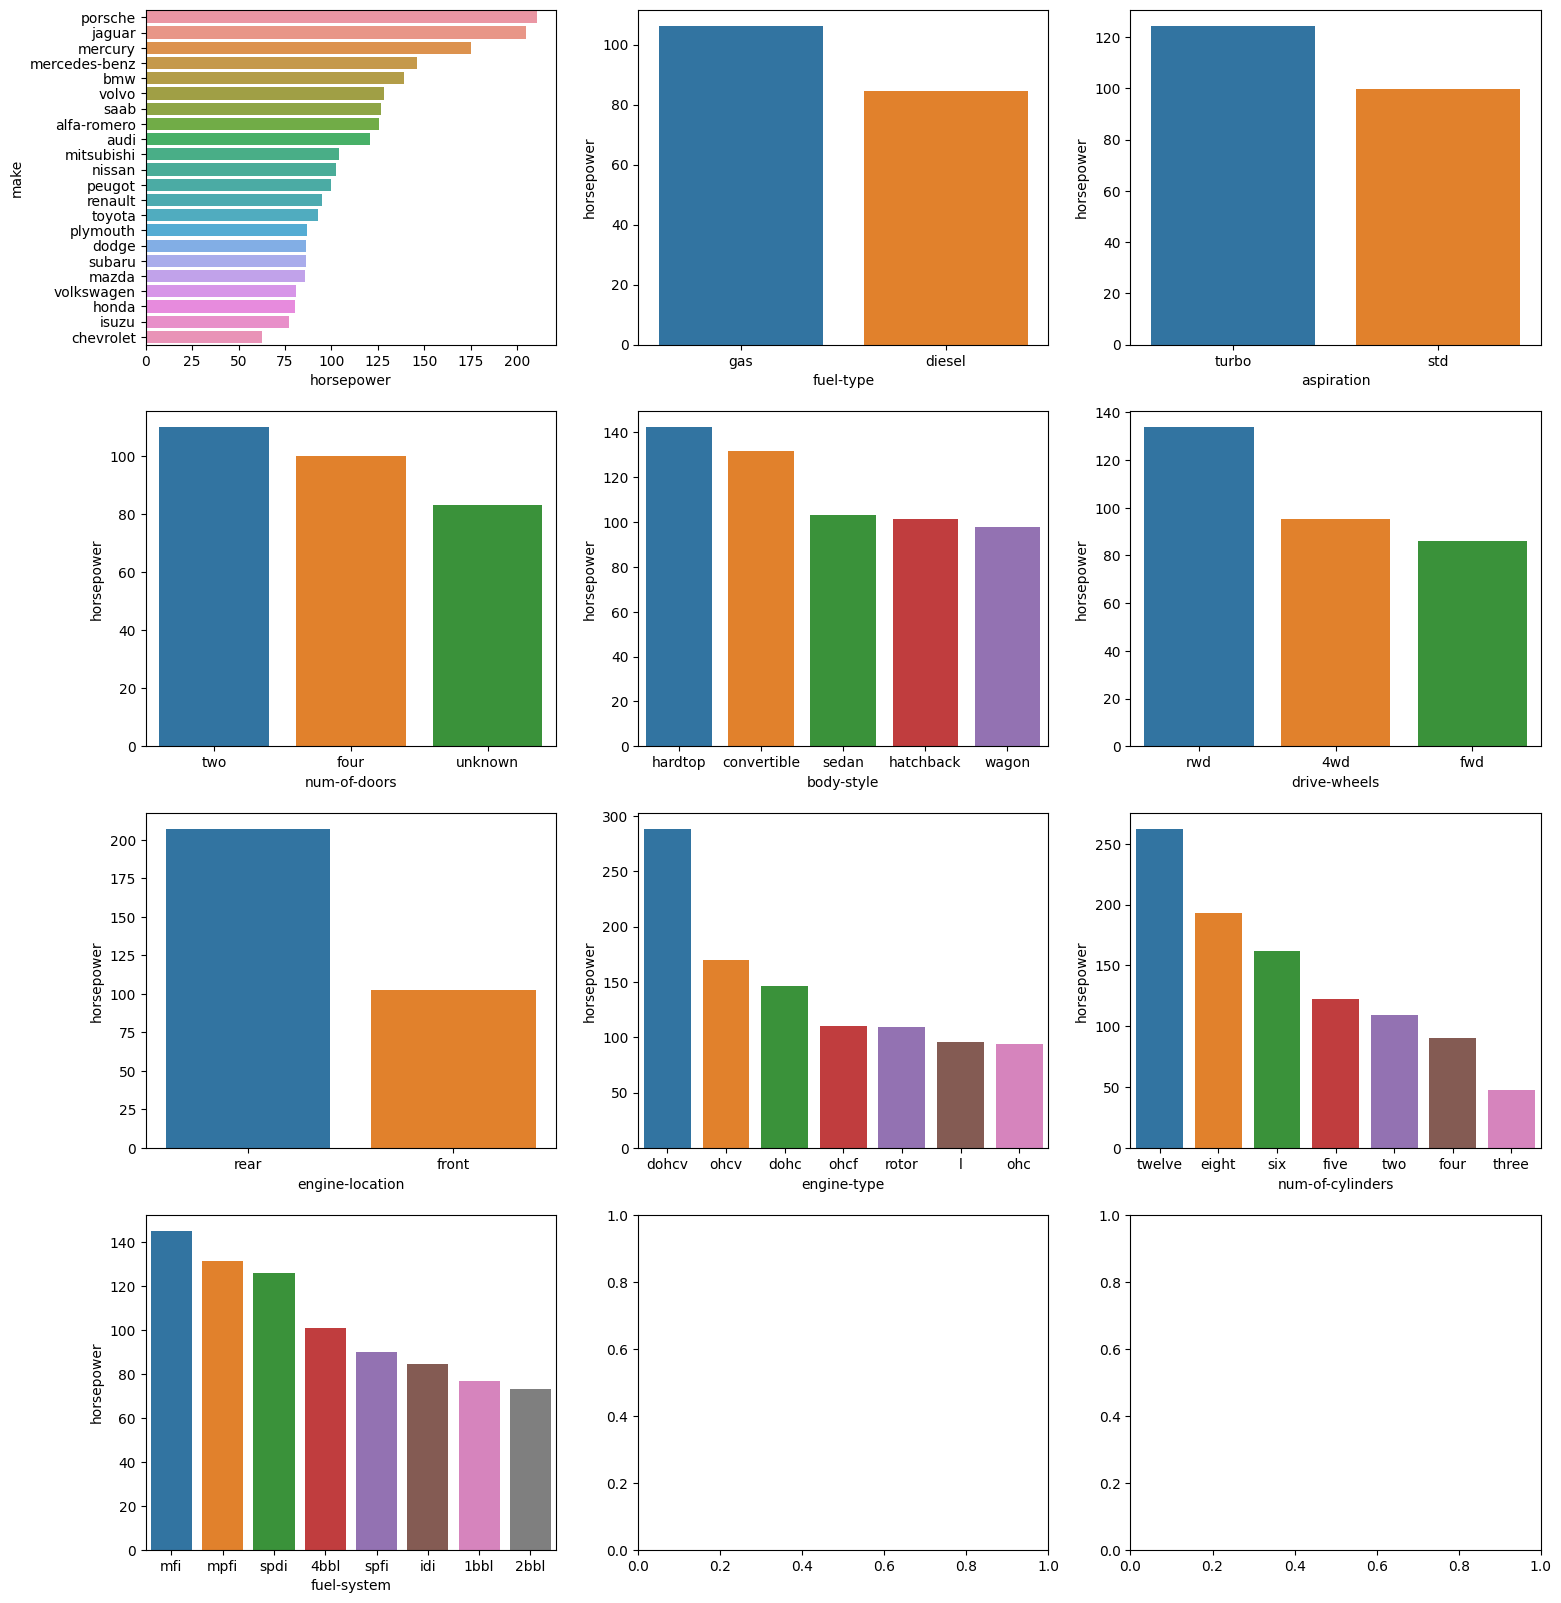

In [36]:
# Plot bar charts for to compare the horsepower of the groups in different variables
fig, axs = plt.subplots(4, 3, figsize=(18, 20))
sns.barplot(x=make_mean, y=make_mean.index, ax=axs[0, 0])
sns.barplot(y=fuel_type_mean, x=fuel_type_mean.index, ax=axs[0, 1])
sns.barplot(y=aspiration_mean, x=aspiration_mean.index, ax=axs[0, 2])
sns.barplot(y=doors_mean, x=doors_mean.index, ax=axs[1, 0])
sns.barplot(y=body_style_mean, x=body_style_mean.index, ax=axs[1, 1])
sns.barplot(y=drive_wheels_mean, x=drive_wheels_mean.index, ax=axs[1, 2])
sns.barplot(y=engine_location_mean, x=engine_location_mean.index, ax=axs[2, 0])
sns.barplot(y=engine_type_mean, x=engine_type_mean.index, ax=axs[2, 1])
sns.barplot(y=num_of_cylinders_mean, x=num_of_cylinders_mean.index, ax=axs[2, 2])
sns.barplot(y=fuel_system_mean, x=fuel_system_mean.index, ax=axs[3, 0])

plt.show()

#### 5.) normalized-losses and 6.)symboling

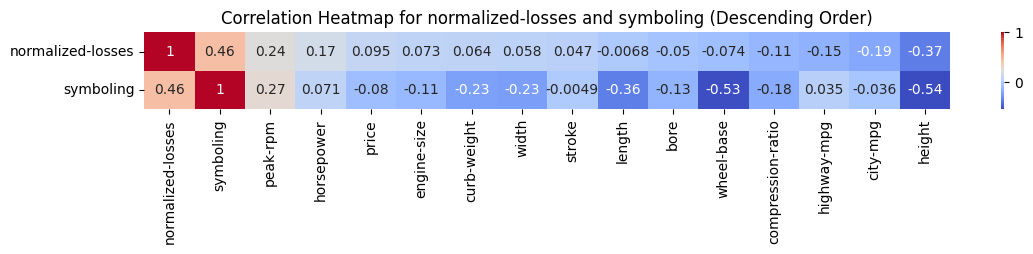

In [37]:
# Calculate the correlation matrix for all columns
correlation_matrix = automobile_df.corr()

# Select only the correlations for 'normalized-losses' and 'symboling'
selected_variables = correlation_matrix.loc[['normalized-losses', 'symboling'], :]

# Sort the correlations in descending order
selected_variables_sorted = selected_variables.sort_values(by=['normalized-losses', 'symboling'], axis=1, ascending=False)

# Create a new DataFrame with the selected and sorted correlations
selected_variables_correlation_df = pd.DataFrame(selected_variables_sorted)

# Create a heatmap using the selected and sorted correlation DataFrame
plt.figure(figsize=(13, 1))
sns.heatmap(selected_variables_correlation_df, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for normalized-losses and symboling (Descending Order)')
plt.show()

We can observe that, higher risk (symboling) gave higher  relative average loss payment per insured vehicle year (normalized-losses): with <strong>positive correlation :0.46 with each other</strong>.

They are both interestingly <strong>positively related to peak-rpm (0.24 and 0.27)</strong>, which is stronger than the relationship with horsepower (only 0.17 and 0.071). RPM stands for revolutions per minute and is a measure of how fast the engine is spinning. The faster an engine spins, the more power it makes. At a higher RPM, the engine is burning more fuel, so it makes more power and consumes more fuel.

Normalized-losse and symboling are <strong>both negatively related to height (-0.37 and -0.54)</strong>, it may suggest taller automobile drivers are more conscious to drive or the taller automobiles are more stable, which made fewer incidents or claims of insurance.

The <strong>larger the wheel-base is also observed to reduced the risks (symboling):-0.53.</strong>

Categorical variables:

In [38]:
# Select the categorical columns you want to include in the correlation calculation
categorical_columns = ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']

# Create a new dataframe with only the selected columns, excluding 'peak-rpm'
selected_columns_df = automobile_df[['normalized-losses', 'symboling'] + categorical_columns]

# Perform one-hot encoding on the categorical columns
encoded_df = pd.get_dummies(selected_columns_df, columns=categorical_columns)

# Compute the correlation matrix
correlation_matrix = encoded_df.corr()

# Extract the correlations between 'normalized-losses' and 'symboling' and other columns
normalized_losses_correlations = correlation_matrix['normalized-losses']
symboling_correlations = correlation_matrix['symboling']

# Sort the correlations in descending order
normalized_losses_correlations_sorted = normalized_losses_correlations.sort_values(ascending=False)
symboling_correlations_sorted = symboling_correlations.sort_values(ascending=False)

# Combine the sorted correlations into a single DataFrame
correlations_df = pd.concat([normalized_losses_correlations_sorted, symboling_correlations_sorted], axis=1)
correlations_df.columns = ['Normalized Losses', 'Symboling']

# Display the correlations in descending order as a table
descending_correlation_table = correlations_df.style.background_gradient(cmap='coolwarm')
descending_correlation_table

,Normalized Losses,Symboling
normalized-losses,1.000000,0.457484
symboling,0.457484,1.000000
num-of-doors_two,0.348850,0.663595
drive-wheels_rwd,0.273564,-0.076381
body-style_hatchback,0.205236,0.435648
make_bmw,0.202613,-0.074482
num-of-cylinders_six,0.197788,-0.000238
fuel-system_mpfi,0.179458,0.012532
make_peugot,0.177668,-0.159891
engine-type_l,0.170806,-0.133979


The overview of the correlations on categorical variables:
#### Symboling:
    
Postive:

num-of-doors_two:0.663595

body-style_hatchback:0.435648


Negative:

num-of-doors_four:-0.656712

make_volvo:-0.403849

body-style_sedan:-0.378341
    
#### Normalized Losses:

Positive:

num-of-doors_two:0.348850

Negative:

num-of-doors_four:-0.354755    

Numbers of doors, body style and the make will be the interesting categorical variables we would like to look at graphs

#### Symboling with different number of doors, body-style and make:

In [43]:
doors_mean_s = automobile_df.groupby(["num-of-doors"])["symboling"].mean().sort_values(ascending=False)
body_style_mean_s = automobile_df.groupby(["body-style"])["symboling"].mean().sort_values(ascending=False)
make_mean_s = automobile_df.groupby(["make"])["symboling"].mean().sort_values(ascending=False)


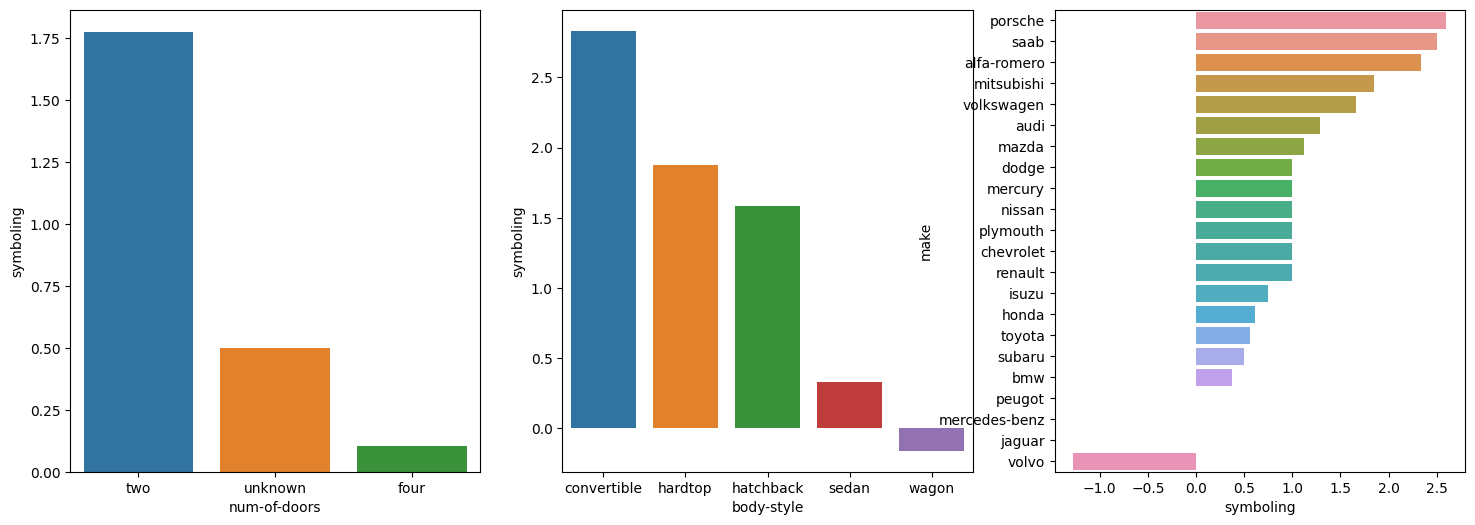

In [47]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
sns.barplot(y=doors_mean_s, x=doors_mean_s.index, ax=axs[0])
sns.barplot(y=body_style_mean_s, x=body_style_mean_s.index, ax=axs[1])
sns.barplot(x=make_mean_s, y=make_mean_s.index, ax=axs[2])

plt.show()

Interestingly volvo is the only manufacturing company getting negative (higher risk) mean symboling.

#### Normalized Losses with number of doors:

In [41]:
doors_mean_n = automobile_df.groupby(["num-of-doors"])["normalized-losses"].mean().sort_values(ascending=False)


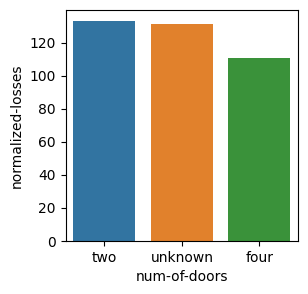

In [42]:
fig, axs = plt.subplots(figsize=(3, 3))
sns.barplot(y=doors_mean_n, x=doors_mean_n.index, ax=axs)

plt.show()

#### Conclusion:

We have looked at the basic statistics of the dataset and we explored is factors affecting:

<strong>1.price, fuel efficient: 2.city-mpg, 3.highway-mpg, 4.horsepower, 5.normalized-losses and 6.symboling</strong>

Price: Larger engine size,horsepower, with drive-wheels of rwd, make of mercedes-benz, system of mpfi increased the price.

Fuel efficient: The cars with higher compression-ratio, smaller engine, drive wheels of fwd, 4 cylinders, fuel-system of 2bbl, engine type of ohc, cheaper (lower price) and smaller size(curb-weight, length, width) had higher fuel efficient.

Horsepower: The cars with bigger engine size, fuel system of mpfi, drive wheelsof rwd, 6 cylinders, engine type of ohcv, make of porsche had higher horsepower.

Normalized-losses and symboling: The cars with 2 doors and body style of hatchback reduced the risks but the same time, the cars with 2 doors had higher normalized-losses.